**[Соревнование](https://inclass.kaggle.com/c/beeline-credit-scoring-competition-2).**

Решается задача кредитного скоринга. 

Признаки клиентов банка:
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимиту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный) Отношение крединых обязтельст к доходу
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - были ли просрочки выплат по кредиту более 90 дней (бинарный) - имеется только в обучающей выборке

*Лимиту по кредиту - максимальный предел предоставляемого кредита.

In [1]:
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Загружаем данные.**

In [2]:
train_df = pd.read_csv('credit_scoring_train.csv', index_col='client_id')
test_df = pd.read_csv('credit_scoring_test.csv', index_col='client_id')

**Заменим пропуски медианными значениями.**

In [3]:
train_df['NumDependents'].fillna(train_df['NumDependents'].median(), inplace=True)
train_df['Income'].fillna(train_df['Income'].max(), inplace=True)
test_df['NumDependents'].fillna(test_df['NumDependents'].median(), inplace=True)
test_df['Income'].fillna(test_df['Income'].max(), inplace=True)

In [127]:
train_df.head(15).T

client_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
DIR,0.496289,0.433567,2.206731e+03,8.861328e+02,0.000000,0.121965,0.461193,2.624982,0.074518,0.266679,2.251012e+03,0.217289,0.269800,0.107320,0.171242
Age,49.100000,48.000000,5.550000e+01,5.530000e+01,52.300000,73.500000,71.300000,46.300000,28.100000,31.300000,4.230000e+01,61.500000,64.300000,42.200000,37.200000
NumLoans,13.000000,9.000000,2.100000e+01,3.000000e+00,1.000000,18.000000,9.000000,6.000000,10.000000,6.000000,1.000000e+01,4.000000,18.000000,4.000000,3.000000
NumRealEstateLoans,0.000000,2.000000,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,3.000000,1.000000,0.000000,0.000000
NumDependents,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,2.000000,2.000000,0.000000
Num30-59Delinquencies,2.000000,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
Num60-89Delinquencies,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
Income,5298.360639,6008.056256,1.805573e+06,1.805573e+06,2504.613105,15634.752299,3562.767475,2205.386980,5021.722284,4005.890242,1.805573e+06,19216.334246,15061.491687,11057.103144,3406.329767
BalanceToCreditLimit,0.387028,0.234679,3.482270e-01,9.719300e-01,1.004350,0.004951,0.039618,0.846364,0.048213,0.366262,4.283820e-01,0.059969,0.086075,1.127067,0.282846
Delinquent90,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [128]:
for col in train_df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(train_df[col]).sum()))

DIR, num. NA's: 0
Age, num. NA's: 0
NumLoans, num. NA's: 0
NumRealEstateLoans, num. NA's: 0
NumDependents, num. NA's: 0
Num30-59Delinquencies, num. NA's: 0
Num60-89Delinquencies, num. NA's: 0
Income, num. NA's: 0
BalanceToCreditLimit, num. NA's: 0
Delinquent90, num. NA's: 0


In [129]:
for col in test_df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(test_df[col]).sum()))

DIR, num. NA's: 0
Age, num. NA's: 0
NumLoans, num. NA's: 0
NumRealEstateLoans, num. NA's: 0
NumDependents, num. NA's: 0
Num30-59Delinquencies, num. NA's: 0
Num60-89Delinquencies, num. NA's: 0
Income, num. NA's: 0
BalanceToCreditLimit, num. NA's: 0


In [130]:
train_df['BalanceToCreditLimit']=train_df['BalanceToCreditLimit'].\
                            apply(lambda x: 1 if x > 10 else x)
test_df['BalanceToCreditLimit']=test_df['BalanceToCreditLimit'].\
                            apply(lambda x: train_df['BalanceToCreditLimit'].mean()\
                                                            if x > 10 else x)

Бинарный признок отношение средст на карте больше или меньше допустимого заема

In [131]:
train_df['PosNegBalance']=train_df['BalanceToCreditLimit'].apply(lambda x: 1 if x > 1 else 0)
test_df['PosNegBalance']=test_df['BalanceToCreditLimit'].apply(lambda x: 1 if x > 1 else 0)

Класификатор нет детей есть до 2 и многодетные

In [132]:
def  Dependents(row):
    if row > 2:
        return 2
    elif row < 1:
        return 0
    else:
        return 1
    
train_df['HaveDependents']=train_df['NumDependents'].apply(Dependents)
test_df['HaveDependents']=test_df['NumDependents'].apply(Dependents)

Классификатор не ипотеки, есть ипотеха, и много ипотех

In [134]:
def RealEstateLoans(row):
    if row > 1:
        return 2
    elif row < 1:
        return 0
    else:
        return 1
    
train_df['RealEstateLoans']=train_df['NumRealEstateLoans'].apply(RealEstateLoans)
test_df['RealEstateLoans']=test_df['NumRealEstateLoans'].apply(RealEstateLoans)

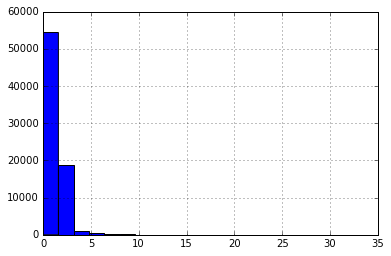

In [49]:
train_df['NumRealEstateLoans'].hist(bins=20)

Убираем выброс NumDelinquencies

In [136]:
train_df['Num30-59Delinquencies']=train_df['Num30-59Delinquencies'].\
                            apply(lambda x: 0 if x > 20 else x)
test_df['Num30-59Delinquencies']=test_df['Num30-59Delinquencies'].\
                            apply(lambda x: 0 if x > 20 else x)
train_df['Num60-89Delinquencies']=train_df['Num60-89Delinquencies'].\
                            apply(lambda x: 0 if x > 20 else x)
test_df['Num60-89Delinquencies']=test_df['Num60-89Delinquencies'].\
                            apply(lambda x: 0 if x > 20 else x)

Имеется прецидент с задолжность

In [137]:
train_df['BinarDelinquencies'] = 0
test_df['BinarDelinquencies'] = 0
train_df.loc[(train_df['Num30-59Delinquencies']>0) | (train_df['Num60-89Delinquencies'] > 0), 'BinarDelinquencies']= 1
test_df.loc[(test_df['Num30-59Delinquencies']>0) | (test_df['Num60-89Delinquencies'] > 0), 'BinarDelinquencies']= 1

Возрастные категории

In [138]:
def  Age(row):
    if row > 45:
        return 2
    elif row < 25:
        return 0
    else:
        return 1
    
train_df['AgeC']=train_df['Age'].apply(Age)
test_df['AgeC']=test_df['Age'].apply(Age)

Устраняем странный случай где отошение кридита к доходу равно нулю и существуют заемы

In [140]:
train_df.loc[(train_df['NumLoans']>0) & (train_df['DIR'] ==0), 'DIR'] = train_df['DIR'].median()

train_df['GeneralLoans'] = train_df['NumLoans'] - train_df['NumRealEstateLoans']
test_df['GeneralLoans'] =  test_df['NumLoans'] - test_df['NumRealEstateLoans']

Создадим рейтинг дисциплинарности

In [142]:
def rate(row):
    if ((row['Num30-59Delinquencies'] != 0) and (row['Num60-89Delinquencies'] != 0)):
        return (row['Num30-59Delinquencies'] * row['Num60-89Delinquencies'])*row['BalanceToCreditLimit']
    else:
        return (row['Num30-59Delinquencies'] + row['Num60-89Delinquencies'])*row['BalanceToCreditLimit']
    
train_df['ClientRate'] = train_df.apply(rate, axis=1)
test_df['ClientRate'] = test_df.apply(rate, axis=1)

Бинырный классификатор для DIR больше или меньше нуля

In [144]:
train_df['DIR_binar']= train_df['DIR'].apply(lambda x: 1 if x>0 else 0)
test_df['DIR_binar']= test_df['DIR'].apply(lambda x: 1 if x>0 else 0)

In [145]:
train_df = train_df.drop\
    (['AgeC', 'NumRealEstateLoans', 'NumDependents', 'RealEstateLoans', 'HaveDependents', 'DIR_binar'],axis=1)

test_df = test_df.drop\
    (['AgeC', 'NumRealEstateLoans', 'NumDependents', 'RealEstateLoans', 'HaveDependents', 'DIR_binar'], axis=1)

In [66]:
train_df.groupby('Delinquent90')

Delinquent90
0    69987
1     5013
dtype: int64

In [82]:
train_df[train_df['Delinquent90'] == 0].sample(frac=0.15, replace=True).count()

DIR                      10498
Age                      10498
NumLoans                 10498
NumRealEstateLoans       10498
NumDependents            10498
Num30-59Delinquencies    10498
Num60-89Delinquencies    10498
Income                   10498
BalanceToCreditLimit     10498
Delinquent90             10498
dtype: int64

Delinquent90
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Num30-59Delinquencies, dtype: object

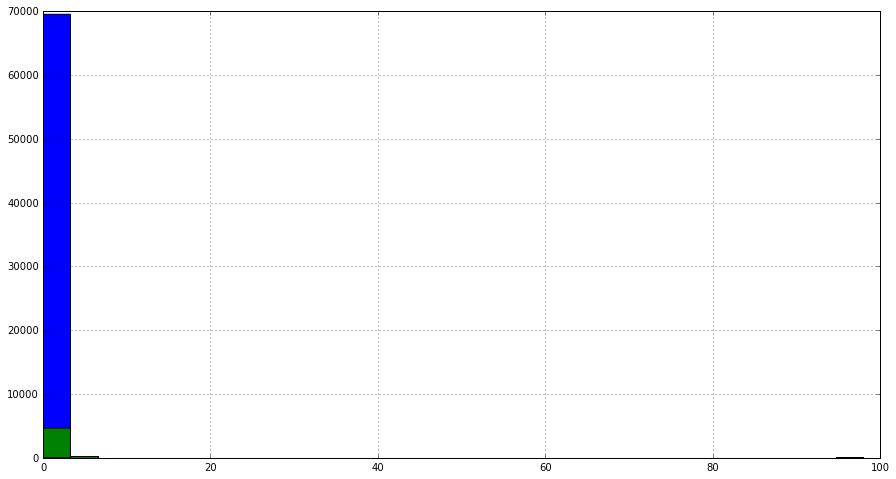

In [64]:
train_df.groupby('Delinquent90')['Num30-59Delinquencies'].hist(bins=30, figsize=(15,8), alpha=0.5)
#train_df[train_df['Delinquent90']==0].hist(bins=10, figsize=(15,8), alpha=0.5, stacked=True, color = 'blue')

**Запиcь прогноз в файл.**

In [8]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Delinquent90', index_label="client_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(75000, 
                                                  predicted_labels.shape[0] + 75000),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

### Случайный лес с подбором параметров

In [4]:
y = train_df['Delinquent90']
train_df.drop('Delinquent90', axis=1, inplace=True)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize, scale
from sklearn.cross_validation import KFold, train_test_split,cross_val_score
from sklearn.metrics import log_loss

import xgboost as xgb

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [10]:
def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, train_df, y).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,len(train_df.columns))),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'class_weight': hp.choice('class_weight', ["balanced", "balanced_subsample"]),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1,10)),
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    print 'new best:', best, params
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=1000, trials=trials)
print 'best:'
print best

new best: 0.69124 {'max_features': 5, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
new best: 0.691346666667 {'max_features': 8, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}
new best: 0.741533333333 {'max_features': 8, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}
new best: 0.839253333333 {'max_features': 8, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 7}
new best: 0.839253333333 {'max_features': 5, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
new best: 0.839253333333 {'max_features': 4, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3}
new best: 0.839253333333 {'max_features': 1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 8}
new best: 0.8

In [12]:
best.

{'class_weight': 0,
 'criterion': 0,
 'max_depth': 18,
 'max_features': 0,
 'min_samples_leaf': 0}

0 max_depth
1 max_features
2 criterion
3 min_samples_leaf


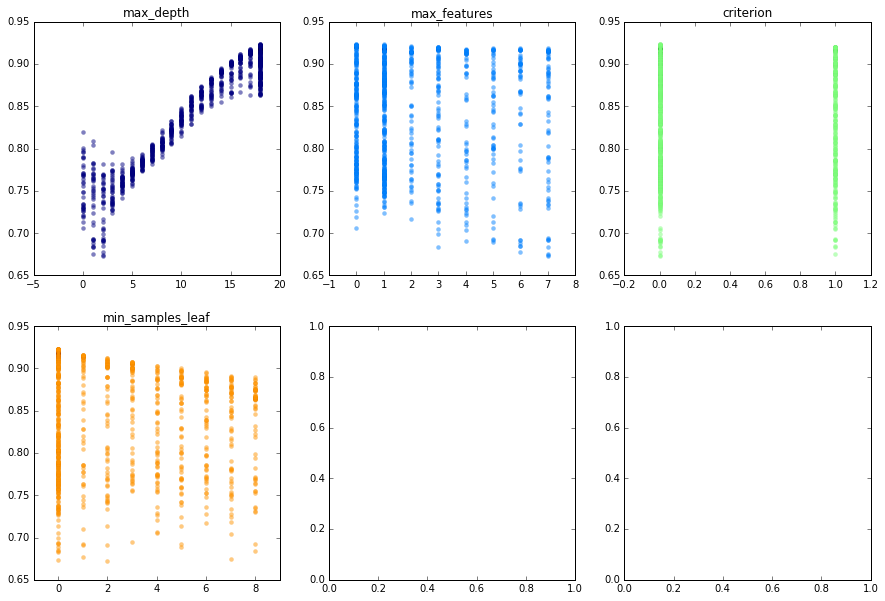

In [14]:
parameters = ['max_depth', 'max_features', 'criterion', 'min_samples_leaf']
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    print i, val
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i/3,i%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    axes[i/3,i%3].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [15]:
fin_forest = RandomForestClassifier(#max_features=3,\
                                    max_depth= 9,\
                                    min_samples_leaf= 5,\
                                    n_estimators = 300,\
                                    criterion='gini', 
                                    random_state=666,
                                    class_weight = 'balanced')
print cross_val_score(fin_forest, train_df, y, scoring='roc_auc').mean()
fin_forest.fit(train_df,y)
forest_prob = fin_forest.predict_proba(test_df)[:, 1]

0.823940065402


In [16]:
pd.DataFrame(fin_forest.feature_importances_, columns=['Importance'],
             index=train_df.columns).sort_values(by='Importance', ascending=False)

,Importance
BalanceToCreditLimit,0.266902
Age,0.142892
DIR,0.126905
Num30-59Delinquencies,0.120244
Income,0.110952
NumLoans,0.088090
Num60-89Delinquencies,0.077526
NumRealEstateLoans,0.037619
NumDependents,0.028870


In [44]:
pd.DataFrame(fin_forest.feature_importances_, columns=['Importance'],
             index=train_df.columns).sort_values(by='Importance', ascending=False)

,Importance
BalanceToCreditLimit,0.306165
Num30-59Delinquencies,0.239954
Num60-89Delinquencies,0.216132
Age,0.063068
NumLoans,0.051821
DIR,0.048699
Income,0.042148
NumRealEstateLoans,0.019457
NumDependents,0.012556


In [17]:
write_to_submission_file(forest_prob, 'credit_scoring_final_forest.csv')